In [49]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [50]:
from evaluator.tester import Tester, train_ds, val_ds, test_ds

In [51]:
import numpy as np
from sklearn.feature_extraction.text import HashingVectorizer

documents = [item.summary for item in train_ds]
documents_val = [item.summary for item in val_ds]
vectorizer = HashingVectorizer(n_features=750, stop_words=["english"])

x_train = vectorizer.fit_transform(documents)
y_train = np.array([float(item.price) for item in train_ds])
x_val = vectorizer.fit_transform(documents_val)
y_val = np.array([float(item.price) for item in val_ds])

In [52]:
from torch import nn
from typing import Any


class NeuralNetwork(nn.Module):

    def __init__(self, input_size: int) -> None:
        super(NeuralNetwork, self).__init__()
        # 9 layers
        self.layer1 = nn.Linear(in_features=input_size, out_features=256)
        self.layer2 = nn.Linear(in_features=256, out_features=256)
        self.layer3 = nn.Linear(in_features=256, out_features=256)
        self.layer4 = nn.Linear(in_features=256, out_features=256)
        self.layer5 = nn.Linear(in_features=256, out_features=256)
        self.layer6 = nn.Linear(in_features=256, out_features=256)
        self.layer7 = nn.Linear(in_features=256, out_features=256)
        self.layer8 = nn.Linear(in_features=256, out_features=128)
        self.layer9 = nn.Linear(in_features=128, out_features=1)

        # activation function
        self.relu = nn.ReLU()

    def forward(self, x: Any) -> Any:
        output1 = self.relu(self.layer1(x))
        output2 = self.relu(self.layer2(output1))
        output3 = self.relu(self.layer3(output2))
        output4 = self.relu(self.layer4(output3))
        output5 = self.relu(self.layer5(output4))
        output6 = self.relu(self.layer6(output5))
        output7 = self.relu(self.layer7(output6))
        output8 = self.relu(self.layer8(output7))
        output9 = self.relu(self.layer9(output8))
        return output9

In [53]:
import torch
from torch.utils.data import DataLoader, TensorDataset

x_train_tensor = torch.FloatTensor(x_train.toarray())
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
x_val_tensor = torch.FloatTensor(x_val.toarray())
y_val_tensor = torch.FloatTensor(y_val).unsqueeze(1)

dataset = TensorDataset(x_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)

input_size = x_train_tensor.shape[1]
model = NeuralNetwork(input_size=input_size)

In [54]:
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
params

620033

In [55]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.005,
)

EPOCHS = 3

for epoch in range(EPOCHS):

    # Training phase
    model.train()
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()

        # 4 steps in a neural network
        outputs = model(batch_x)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val_tensor)
        val_loss = loss_function(val_outputs, y_val_tensor)

print(f"Completed {EPOCHS} epochs with training and validation phase")

Completed 3 epochs with training and validation phase


In [56]:
from models.item import Item


def neural_network_model(item: Item) -> float:
    model.eval()
    x = vectorizer.fit_transform([item.summary])
    x = torch.FloatTensor(x.toarray())
    y = ((model(x))[0]).item()
    return y

1: Guess: $0.00 Truth: $35.00 Error: $35.00 SLE: 12.84 Item: Small Soar Dove Bird Necklace, Delicate ...
2: Guess: $0.00 Truth: $25.00 Error: $25.00 SLE: 10.62 Item: Omaha Steaks Gift Card
3: Guess: $0.00 Truth: $285.00 Error: $285.00 SLE: 31.99 Item: Ohana Baritone Ukulele Model BK-20CE
4: Guess: $0.00 Truth: $4.88 Error: $4.88 SLE: 3.14 Item: BodyGuardz - Pure 2 Edge Glass Screen Pr...
5: Guess: $0.00 Truth: $5.00 Error: $5.00 SLE: 3.21 Item: Numer 1 Dad Iron On Decal, Father's Day ...
6: Guess: $0.00 Truth: $16.99 Error: $16.99 SLE: 8.35 Item: I Love My Maltese Rhinestone Iron on Tra...
7: Guess: $0.00 Truth: $84.99 Error: $84.99 SLE: 19.84 Item: JJ Electronics Amplifier Tubes (T-EL84-J...
8: Guess: $0.00 Truth: $18.99 Error: $18.99 SLE: 8.97 Item: Women’s Satin Kimono Robe for Bridesmaid...
9: Guess: $0.00 Truth: $22.08 Error: $22.08 SLE: 9.85 Item: Monoprice PLA Plus+ Premium 3D Filament ...
10: Guess: $0.00 Truth: $39.98 Error: $39.98 SLE: 13.79 Item: LOVEVOOK Laptop Backpack for

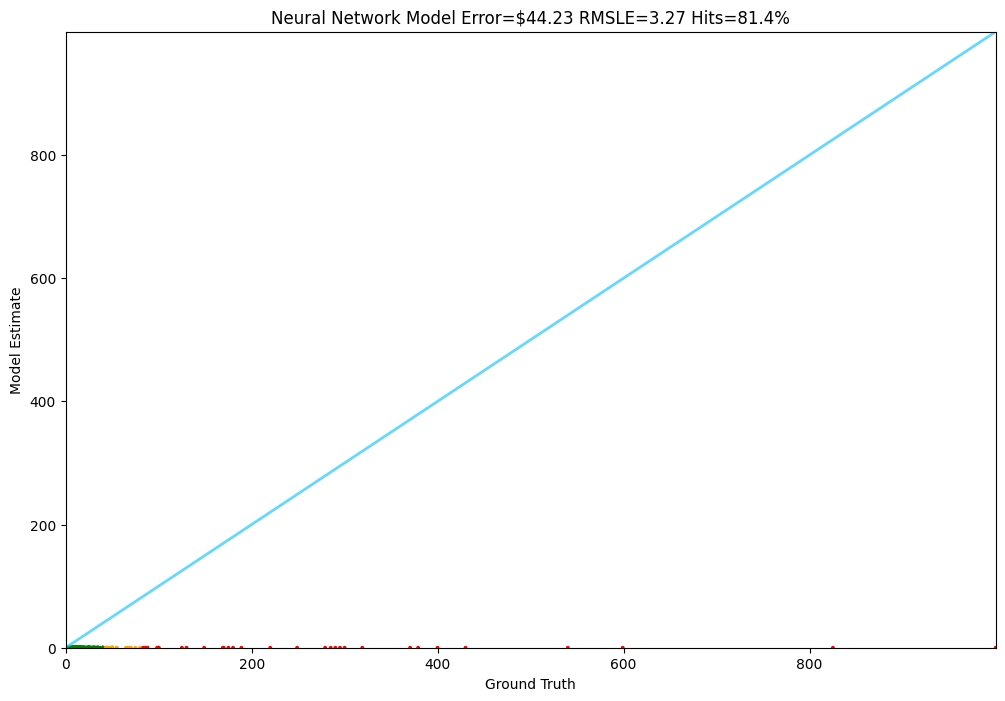

In [57]:
Tester.test(neural_network_model)